# Exercici 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [160]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

text="""In today's area of internet and online services, data is generating at incredible speed and amount. Generally, 
Data analyst, engineer, and scientists are handling relational or tabular data. These tabular data columns have either 
numerical or categorical data. Generated data has a variety of structures such as text, image, audio, and video. Online 
activities such as articles, website text, blog posts, social media posts are generating unstructured textual data. 
"""

tokenized_word=word_tokenize(text)
tokenized_sent=sent_tokenize(text)

In [161]:
#Frequency Distribution

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 55 samples and 85 outcomes>


### Frequency Distribution

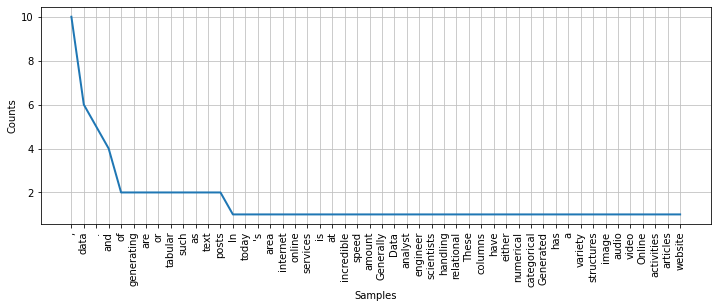

In [162]:
plt.figure(figsize = (12, 4))

fdist.plot(50,cumulative=False)
plt.show()

In [163]:
fdist.most_common()

[(',', 10),
 ('data', 6),
 ('.', 5),
 ('and', 4),
 ('of', 2),
 ('generating', 2),
 ('are', 2),
 ('or', 2),
 ('tabular', 2),
 ('such', 2),
 ('as', 2),
 ('text', 2),
 ('posts', 2),
 ('In', 1),
 ('today', 1),
 ("'s", 1),
 ('area', 1),
 ('internet', 1),
 ('online', 1),
 ('services', 1),
 ('is', 1),
 ('at', 1),
 ('incredible', 1),
 ('speed', 1),
 ('amount', 1),
 ('Generally', 1),
 ('Data', 1),
 ('analyst', 1),
 ('engineer', 1),
 ('scientists', 1),
 ('handling', 1),
 ('relational', 1),
 ('These', 1),
 ('columns', 1),
 ('have', 1),
 ('either', 1),
 ('numerical', 1),
 ('categorical', 1),
 ('Generated', 1),
 ('has', 1),
 ('a', 1),
 ('variety', 1),
 ('structures', 1),
 ('image', 1),
 ('audio', 1),
 ('video', 1),
 ('Online', 1),
 ('activities', 1),
 ('articles', 1),
 ('website', 1),
 ('blog', 1),
 ('social', 1),
 ('media', 1),
 ('unstructured', 1),
 ('textual', 1)]

#### Conclusions
Com que es tracta d'un text extret de la teoria d'aquest Sprint, a part de la coma i el punt, la paraula amb una freqüència més alta és "data".

# Exercici 2
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [164]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words=set(stopwords.words("english"))

In [165]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Text:\n",tokenized_word)
print("\nFilterd Text:\n",filtered_sent)

Tokenized Text:
 ['In', 'today', "'s", 'area', 'of', 'internet', 'and', 'online', 'services', ',', 'data', 'is', 'generating', 'at', 'incredible', 'speed', 'and', 'amount', '.', 'Generally', ',', 'Data', 'analyst', ',', 'engineer', ',', 'and', 'scientists', 'are', 'handling', 'relational', 'or', 'tabular', 'data', '.', 'These', 'tabular', 'data', 'columns', 'have', 'either', 'numerical', 'or', 'categorical', 'data', '.', 'Generated', 'data', 'has', 'a', 'variety', 'of', 'structures', 'such', 'as', 'text', ',', 'image', ',', 'audio', ',', 'and', 'video', '.', 'Online', 'activities', 'such', 'as', 'articles', ',', 'website', 'text', ',', 'blog', 'posts', ',', 'social', 'media', 'posts', 'are', 'generating', 'unstructured', 'textual', 'data', '.']

Filterd Text:
 ['In', 'today', "'s", 'area', 'internet', 'online', 'services', ',', 'data', 'generating', 'incredible', 'speed', 'amount', '.', 'Generally', ',', 'Data', 'analyst', ',', 'engineer', ',', 'scientists', 'handling', 'relational', '

### Stemming & Lemmatization

In [166]:
# Fem els dos passos partint de les paraules filtrades amb l'Stopword
ps = PorterStemmer()
lem = WordNetLemmatizer()

stemmed_words=[]
lematized_words=[]

for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    lematized_words.append(lem.lemmatize(w, 'v'))
print("Filtered Text:\n",filtered_sent)
print("\nStemmed Text:\n",stemmed_words)
print("\nLematized Text:\n",lematized_words)

Filtered Text:
 ['In', 'today', "'s", 'area', 'internet', 'online', 'services', ',', 'data', 'generating', 'incredible', 'speed', 'amount', '.', 'Generally', ',', 'Data', 'analyst', ',', 'engineer', ',', 'scientists', 'handling', 'relational', 'tabular', 'data', '.', 'These', 'tabular', 'data', 'columns', 'either', 'numerical', 'categorical', 'data', '.', 'Generated', 'data', 'variety', 'structures', 'text', ',', 'image', ',', 'audio', ',', 'video', '.', 'Online', 'activities', 'articles', ',', 'website', 'text', ',', 'blog', 'posts', ',', 'social', 'media', 'posts', 'generating', 'unstructured', 'textual', 'data', '.']

Stemmed Text:
 ['in', 'today', "'s", 'area', 'internet', 'onlin', 'servic', ',', 'data', 'gener', 'incred', 'speed', 'amount', '.', 'gener', ',', 'data', 'analyst', ',', 'engin', ',', 'scientist', 'handl', 'relat', 'tabular', 'data', '.', 'these', 'tabular', 'data', 'column', 'either', 'numer', 'categor', 'data', '.', 'gener', 'data', 'varieti', 'structur', 'text', ','

# Exercici 3
Realitza sentiment analysis al teu conjunt de dades.

In [168]:
from textblob import TextBlob

Primer fem l'evaluació de Polaritat i Subjectivitat del text sencer i després per cada frase per separat amb el módul TextBold. La polaritat és un decimal entre -1 i 1 (on -1 és molt negatiu, 0 neutre, i 1 positiu) i la subjectivitat és un número entre 0 i 1 (0 molt objectiu i 1 molt subjectiu).
També farem la comparació de polaritat fent servir el model de NLTK.

In [169]:
wiki_text = TextBlob(text)
wiki_text.sentiment

Sentiment(polarity=0.19666666666666668, subjectivity=0.49333333333333335)

In [183]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

feelings = SentimentIntensityAnalyzer()

df_text_sent = pd.DataFrame(tokenized_sent, columns=['Sentence'])

df_text_sent['Polarity_TextBlob'] = [TextBlob(i).sentiment.polarity for i in df_text_sent['Sentence']]
df_text_sent['Subjectivity_TextBlob'] = [TextBlob(i).sentiment.subjectivity for i in df_text_sent['Sentence']]
df_text_sent['Polarity_NLTK'] = [feelings.polarity_scores(i) for i in df_text_sent['Sentence']]

df_text_sent
df_text_sent.style.set_properties(subset=['Polarity_NLTK'], **{'width': '300px'})

,Sentence,Polarity_TextBlob,Subjectivity_TextBlob,Polarity_NLTK
0,"In today's area of internet and online services, data is generating at incredible speed and amount.",0.900000,0.900000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,"Generally, Data analyst, engineer, and scientists are handling relational or tabular data.",0.050000,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,These tabular data columns have either numerical or categorical data.,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,"Generated data has a variety of structures such as text, image, audio, and video.",0.000000,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,"Online activities such as articles, website text, blog posts, social media posts are generating unstructured textual data.",0.016667,0.283333,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


#### Conclusions
Comparant els resultats entre el model NLTK i el TextBlob, veiem que el NTLK identifica totes les frases del text com neutres, mentre que el TextBlob torna uns resultats més concrets i diversos. Segons els TextBlob la primera frase és la que millor es pot intepretar amb valor de 0,9 tan per la subjectivitat com per la polaritat.